# DATA PREPROCESSING

# Introduction

**1- Data cleaning / cleansing**
    
    *noisy data
    *missing observation analysis
    *outlier observation analysis
    
    
**2- Data standardization**
    
    *0-1 transformation
    *transformation to z-score
    *logarithmic transformation
    
    
**3- Data reduction**
    
    *decreasing observation count
    *decreasing variable count
    
    
**4- Variable transformations**
    
    *transformations for continuous variables
    *transformations for categorical variables


**5- Variable engineering**


**Noisy data:**

- errors associated with data source
- inconsistency
- multiplexing in records


# Outlier Observation

**outlier observation:** A data point that differs significantly from other observations (an observation that has at least one outlier value)

**outlier value:** Numerical value expressing anomaly

outlier value misguides rule sets or functions created with *generalizability* concern and causes biasness.

![](img1.jpg)


## One Variable Outlier Observation Analysis

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds') 
df = diamonds.copy()
df = df.select_dtypes(include = ['float64', 'int64']) 
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


### Choose a variable

In [3]:
df_table = df["table"].copy()

**visualize:**

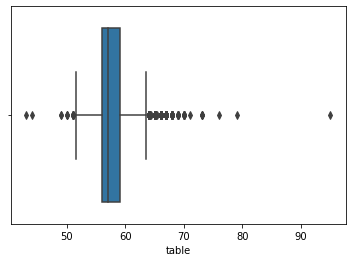

In [4]:
sns.boxplot(x = df_table)

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1- 1.5*IQR
lower_limit

upper_limit = Q3 + 1.5*IQR
upper_limit

63.5

### Query for outlier values

In [6]:
(df_table < (lower_limit)) | (df_table > (upper_limit))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [7]:
df_table < (lower_limit)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [8]:
outlier_tf = df_table < (lower_limit)

In [9]:
outlier_tf[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

### Catch outlier values

In [10]:
outliers = df_table[outlier_tf]
outliers.index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

### Solve outlier value problem

In [11]:
import pandas as pd

In [12]:
df_table.head()
type(df_table)

pandas.core.series.Series

**it is a pandas series but it should be a dataframe! fix it!**

In [13]:
df_table = pd.DataFrame(df_table) 

In [14]:
type(df_table)

pandas.core.frame.DataFrame

In [15]:
df_table.shape

(53940, 1)

**Deleting outlier values:**

In [16]:
clean_df_table = df_table[~((df_table < (lower_limit)) | (df_table > (upper_limit))).any(axis = 1)]


In [17]:
clean_df_table.shape

(53335, 1)

**Filling outlier values with mean values:**

In [18]:
df_table = df["table"].copy()

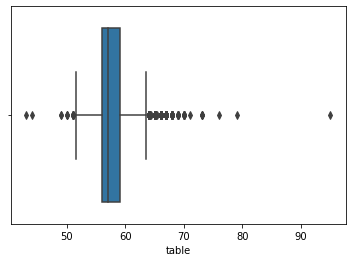

In [19]:
sns.boxplot(x = df_table)

In [20]:
df_table[outlier_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [21]:
df_table.mean()

57.45718390804603

In [22]:
df_table[outlier_tf] = df_table.mean()

In [23]:
df_table[outlier_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [24]:
outlier_tf = (df_table < (lower_limit)) | (df_table > (upper_limit))

In [25]:
df_table[outlier_tf].head()

2      65.0
91     69.0
145    64.0
219    64.0
227    67.0
Name: table, dtype: float64

In [26]:
df_table.describe()

count    53940.000000
mean        57.459505
std          2.230030
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [27]:
df_table[outlier_tf] = df_table.mean()

In [28]:
df_table.describe()

count    53940.000000
mean        57.374369
std          2.062703
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

**Filling outlier values by trimming:**

- If there are many outlier values, you can think they are a part of generalization and repress them to upper limit and lower limit; not to mean

- You should do it both upper outliers and lower outliers separately

In [29]:
df_table = df["table"].copy()

In [30]:
outlier_tf = df_table < (lower_limit)

In [31]:
df_table[outlier_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [32]:
df_table[outlier_tf] = lower_limit 

In [33]:
df_table[outlier_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

## Multiple Variable Outlier Observation Analysis

### Local Outlier Factor

LOF -> by this method, we can do density based scoring of observations and define outliers -> local density of a point is compared to its environment -> if environment density of a point is less than others, it is in a rare environments so can be an outlier

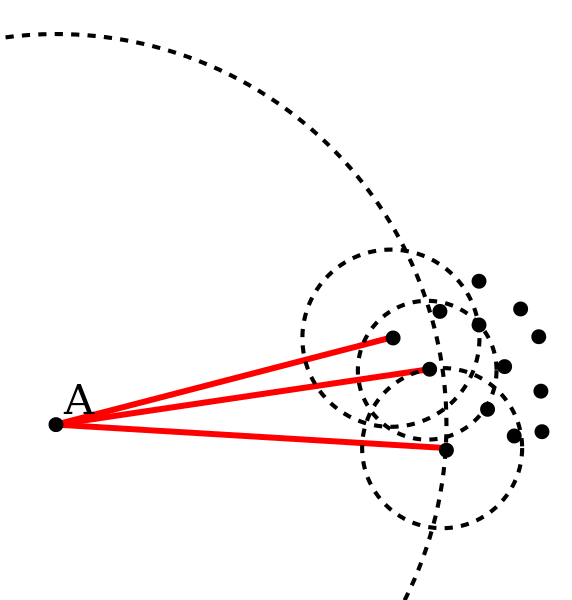

In [34]:
from IPython.display import Image
Image(filename =  "lof_intuition.png" , width=400, height=400)

### Create An Artificial Dataset

**normal values:**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = np.random.normal(70, 3, (100, 2))

X_inliers = np.r_[X_inliers + 10, X_inliers - 10] 

print(X_inliers.shape)
print(X_inliers[:3,:2])

(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


**outlier values:**

In [36]:
X_outliers = np.random.uniform(low=15, high=130, size=(20, 2))

In [37]:
X_outliers

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

**combine normal and outlier values:**

In [38]:
X = np.r_[X_inliers, X_outliers]

In [39]:
X[0:3,:]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

### Calculate LOF Scores

In [40]:
LOF = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [41]:
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [42]:
X_score = LOF.negative_outlier_factor_

In [43]:
X_score[0:3]

array([-0.99920793, -1.14732911, -0.97212675])

In [44]:
X_score.mean()

-1.6850227435158005

In [45]:
X_score.std()

2.140119050235338

In [46]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

<function matplotlib.pyplot.show(*args, **kw)>

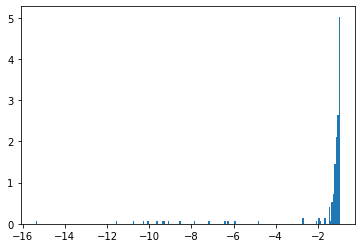

In [47]:
plt.hist(X_score, bins = "auto", density = True)
plt.show

### Visualize outlier observations

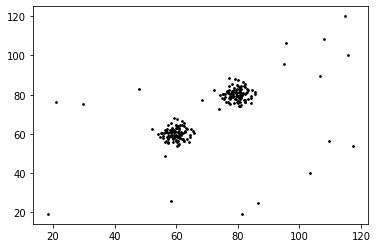

In [48]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Observation Units");

In [49]:
radius = radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

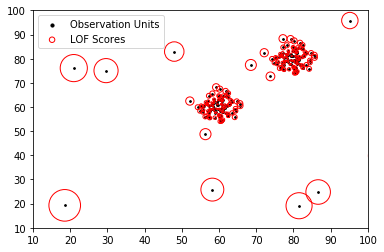

In [50]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Observation Units");

plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors='r', 
            facecolors='none',label='LOF Scores')

plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = "upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]

### Catch outlier observations

In [51]:
X[0:3]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [52]:
np.sort(X_score)[0:9]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573])

In [53]:
threshold_value = np.sort(X_score)[9]
threshold_value

-8.512759037993277

In [54]:
(X_score > threshold_value)[200:220]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [55]:
tf_vector = (X_score > threshold_value)

In [56]:
X[X_score < threshold_value]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [57]:
X[~tf_vector]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [58]:
X[X_score < threshold_value]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [59]:
X[200:220]

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

### Solve outlier value problem

**deleting outliers:**

In [60]:
df = X[X_score > threshold_value]

In [61]:
df[0:10]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

**changing outliers with means:**

In [62]:
df_X = X.copy()

In [63]:
np.mean(df_X[0])
np.mean(df_X[1])

83.25607759176307

In [64]:
df_X[~tf_vector]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [65]:
outlierss = df_X[~tf_vector]

In [66]:
outlierss[:,:1]

array([[114.71331664],
       [117.35061431],
       [ 58.19203955],
       [ 81.50221621],
       [ 18.50752874],
       [109.59906448],
       [ 29.61195895],
       [103.54925861],
       [ 86.63240472],
       [ 20.94339793]])

In [67]:
outlierss[:,:1] = np.mean(df_X[0])

In [68]:
outlierss[:,1:2] = np.mean(df_X[1])

In [69]:
outlierss

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [70]:
df_X[~tf_vector] = outlierss

In [71]:
df_X[~tf_vector]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

**filling by trimming:**

In [72]:
df_X = X.copy()

In [73]:
df_X[~tf_vector]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [74]:
df_X[X_score == threshold_value]

array([[58.19203955, 25.80792308]])

In [75]:
df_X[~tf_vector] = df_X[X_score == threshold_value]

In [76]:
df_X[~tf_vector]

array([[58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308]])